In [1]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [2]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [3]:
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Students table created!


In [4]:
# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [5]:
# Sample data to insert into the student table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the student table!")

Data inserted into the student table!


In [6]:
# Sample data to insert into the grades table
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [45]:
# Retrieve all students' names and their grades
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

grades = cursor.fetchall()

# Display the result
for row in grades:
    print(f"Student: {row[0]} {row[1]}, Subject: {row[2]}, Grade: {row[3]}")


Student: Alice Johnson, Subject: Math, Grade: 95
Student: Alice Johnson, Subject: English, Grade: 88
Student: Alice Johnson, Subject: History, Grade: 90
Student: Bob Smith, Subject: Math, Grade: 82
Student: Bob Smith, Subject: English, Grade: 76
Student: Bob Smith, Subject: History, Grade: 85


In [40]:
# Find the average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
''')

avg_grades = cursor.fetchall()

for row in avg_grades:
    print(row[0], row[1], ", Average Grade:", row[2])


Alice Johnson , Average Grade: 91.0
Bob Smith , Average Grade: 81.0


In [31]:
# Find the student with the highest grade

# Find the average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
''')

# creating objects for highest grade and top student
avg_grades = cursor.fetchall()
highest_grade = 0
top_student = None

# iterating through and assigning highest grade / top student if student's
# average grade is higher than the highest_grade object
for row in avg_grades:
  if row[2] > highest_grade or highest_grade is None:
    highest_grade = row[2]
    top_student = row

# displaying
print("Top Student:", top_student[0], top_student[1],
      ", Average Grade: ", top_student[2])


Top Student: Alice Johnson , Average Grade:  91.0


In [33]:
# Find the average grade for the Math subject

cursor.execute('''
SELECT AVG(grades.grade) FROM grades WHERE subject = "Math"
''')

math_avg = cursor.fetchone()

print("Average Math Grade:", math_avg[0])

Average Math Grade: 88.5


In [46]:
# List all students who scored above 90 in any subject

cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name FROM students
JOIN grades ON students.student_id = grades.student_id WHERE grades.grade > 90;
''')

# Fetch all results
smarties = cursor.fetchall()

# Display the results
print("Student(s) who scored above 90 in any subject:")
for row in smarties:
    print(row[0], row[1])

Student(s) who scored above 90 in any subject:
Alice Johnson


In [58]:
# Using pandas to load the data from students into DataFrames

import pandas as pd

# Query the students data into a DataFrame
df_studs = pd.read_sql_query('SELECT * FROM students', connection)

# Display the DataFrame
df_studs.head()


,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [59]:
# Using pandas to load the data from grades into DataFrames

import pandas as pd

# Query the grades data into a DataFrame
df_grades = pd.read_sql_query('SELECT * FROM grades', connection)

# Display the DataFrame
df_grades.head()


,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [60]:
# Use join queries to combine the data from both tables into a single DataFrame
# that includes each student's name, subject, and grade

# Perform a JOIN query between students and grades
df_joined = pd.read_sql_query(''' SELECT students.first_name, students.last_name,
grades.subject, grades.grade FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)

# Display the DataFrame
df_joined.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


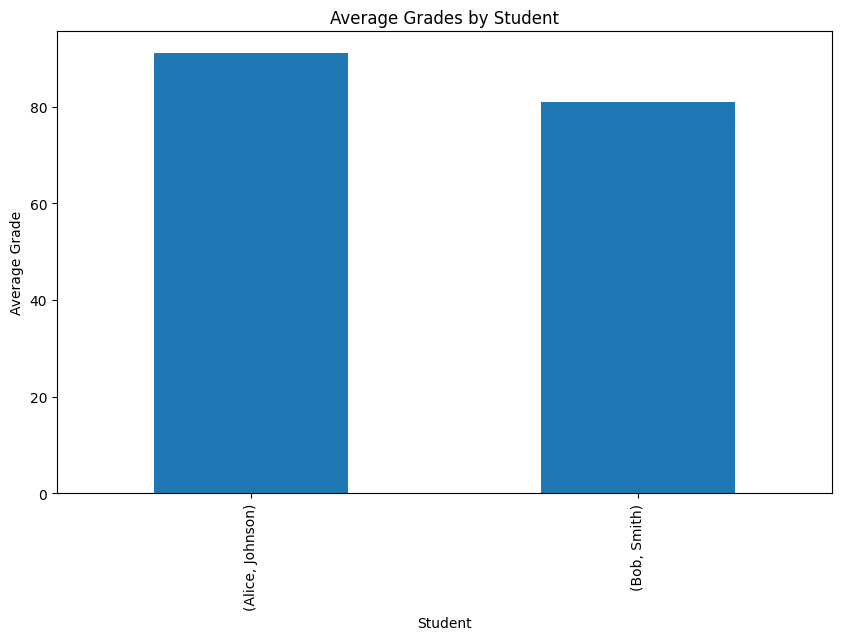

In [61]:
# Visualize the data with Matplotlib
!pip install matplotlib==3.7.1
import matplotlib.pyplot as plt

avg_grades = df_joined.groupby(['first_name', 'last_name'])['grade'].mean()

# plot average grades for each student
plt.figure(figsize=(10,6))
avg_grades.plot(kind='bar')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades by Student')
plt.show()


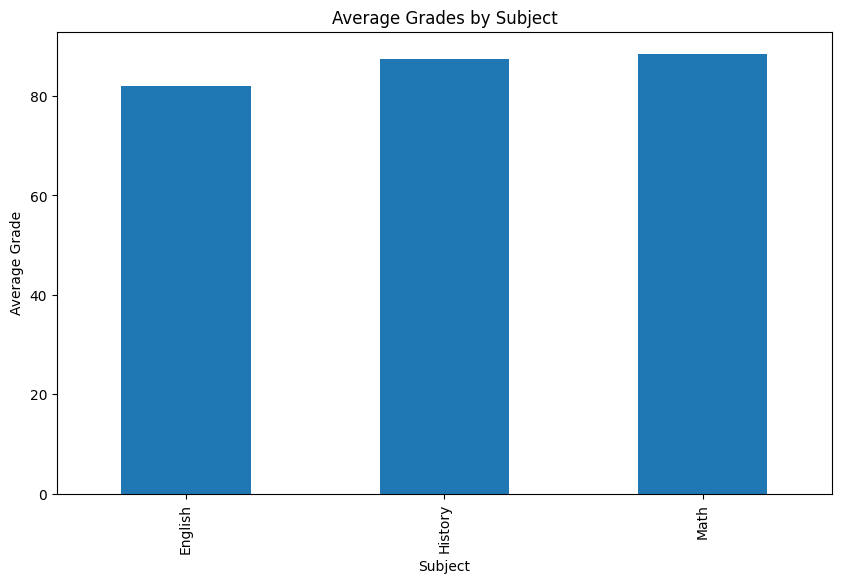

In [62]:
# Visualize the data with Matplotlib

!pip install matplotlib==3.7.1
import matplotlib.pyplot as plt

# Plot average grades by subject
avg_grades = df_joined.groupby(['subject'])['grade'].mean()

# plot average grades for each student
plt.figure(figsize=(10,6))
avg_grades.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades by Subject')
plt.show()